### Importing all the necessary Libraraies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

### Reading Csv File

In [2]:
df=pd.read_csv('car.csv')
df.head()

,Name,Price,Used For,Transmisson,Colour,Make Year,Mileage,Engine (CC),Fuel,Kilometer Run,Waranty,Types
0,Hyundai | i20 Active S | TDi | 2015 | Hatchbac...,"रू. 24,75,000रू. 25,00,000",Private Use,Manual2WD,Brown,2015,14,1400,Petrol,42000,NaN,NaN
1,Excellent car on sale (Hyundai),"रू. 7,50,000",NaN,Auto2WD,Light blue,2005,11,1399,Petrol,87412,NaN,NaN
2,TATA 407 Container (Tata),"रू. 7,00,000",NaN,Manual - 2WD,White,2013,NaN,2956,Diesel,60000,NaN,NaN
3,4x4 swaraj Mazda (Mahindra),"रू. 6,00,000",NaN,Manual - 4WD,NaN,2017,NaN,NaN,Diesel,NaN,NaN,NaN
4,i20 Active good for used few time (Hyundai),रू. 375,NaN,Auto - 2WD,white,2019,17,1200,Petrol,2400,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           848 non-null    object 
 1   Price          848 non-null    object 
 2   Used For       357 non-null    object 
 3   Transmisson    848 non-null    object 
 4   Colour         766 non-null    object 
 5   Make Year      848 non-null    object 
 6   Mileage        458 non-null    object 
 7   Engine (CC)    741 non-null    object 
 8   Fuel           848 non-null    object 
 9   Kilometer Run  706 non-null    object 
 10  Waranty        209 non-null    object 
 11  Types          0 non-null      float64
dtypes: float64(1), object(11)
memory usage: 79.6+ KB


In [4]:
df_before=df.copy()

### Checking for sum of Null values for every column

In [5]:
df.isnull().sum()

Name               0
Price              0
Used For         491
Transmisson        0
Colour            82
Make Year          0
Mileage          390
Engine (CC)      107
Fuel               0
Kilometer Run    142
Waranty          639
Types            848
dtype: int64

### Checking for columns that has more than 50% NA values

In [6]:
missing_percent = df.isnull().mean() * 100
# columns_over_50_na = missing_percent[missing_percent > 50]
print(missing_percent)

Name               0.000000
Price              0.000000
Used For          57.900943
Transmisson        0.000000
Colour             9.669811
Make Year          0.000000
Mileage           45.990566
Engine (CC)       12.617925
Fuel               0.000000
Kilometer Run     16.745283
Waranty           75.353774
Types            100.000000
dtype: float64


### Dropping Columns that has more than 50% NA values

In [7]:
df=df.drop('Waranty', axis=1)
df=df.drop('Types', axis=1)
df=df.drop('Used For', axis=1)

### Renaming Column 'Price' to "Price(in Nrs)"
-Also removing anything that is not digit with nothing but ''.
-(eg 2,4,7500-->247500)

In [8]:
df.rename(columns={'Price': 'Price(in Nrs)'}, inplace=True)
df['Price(in Nrs)'] = df['Price(in Nrs)'].str.replace(r'[^0-9]', '', regex=True)

### Checking for prices that has length>10

In [9]:
long_prices = df[df['Price(in Nrs)'].str.len() > 10]  
print(long_prices[['Price(in Nrs)']])



      Price(in Nrs)
0    24750002500000
704  57500005800000
735  30500003075000
762  24500002475000
793  20250002050000
794  23500002375000
802  26000002625000


### Dropping them

In [10]:
df = df.drop(long_prices.index).reset_index(drop=True)


### Checking for outliers using BoxPlot

count    8.410000e+02
mean     2.334199e+06
std      2.187994e+06
min      3.750000e+02
25%      1.175000e+06
50%      1.750000e+06
75%      2.650000e+06
max      2.400000e+07
Name: Price(in Nrs), dtype: float64


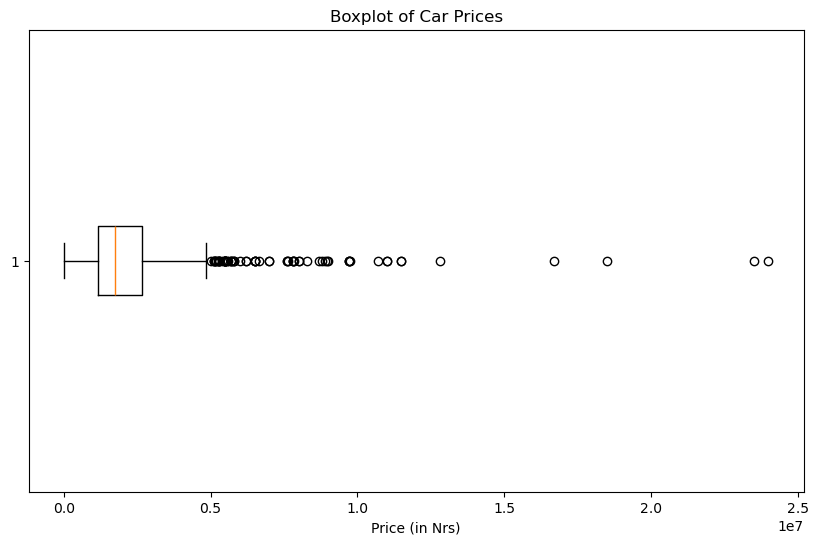

In [11]:
df['Price(in Nrs)'] = pd.to_numeric(df['Price(in Nrs)'], errors='coerce')

print(df['Price(in Nrs)'].describe())

plt.figure(figsize=(10, 6))
plt.boxplot(df['Price(in Nrs)'].dropna(), vert=False)
plt.title("Boxplot of Car Prices")
plt.xlabel("Price (in Nrs)")
plt.show()


### Dropping those rows that has price<10000

In [12]:
df = df[df['Price(in Nrs)'] >= 10000].reset_index(drop=True)


### Checking if the column 'Price' has appropriate data type

In [13]:
df['Price(in Nrs)'].dtype

dtype('int64')

### Getting sum of values that is occuring more than once

In [14]:
df['Price(in Nrs)'].duplicated().sum()

532

### Keeping only the first occurence

In [15]:
# df = df.drop_duplicates(subset='Price(in Nrs)', keep='first').reset_index(drop=True)


### Checking for null in column 'Transmisson'

In [16]:
df['Transmisson'].isnull().sum()

0

### Checking if the column 'Transmisson' needs cleaning

In [17]:
df['Transmisson'].unique()

array(['Auto2WD', 'Manual - 2WD', 'Manual - 4WD', 'Manual2WD', 'Auto4WD',
       'Manual4WD', 'Auto - 2WD', 'Auto - 4WD', 'PowerSteering',
       'Power Steering'], dtype=object)

### Cleaning the Column
-that is removing '-', ' ' etc

In [18]:
df['Transmisson']=df['Transmisson'].str.replace('-','').str.replace(' ','')

### After cleaning

In [19]:
df['Transmisson'].unique()

array(['Auto2WD', 'Manual2WD', 'Manual4WD', 'Auto4WD', 'PowerSteering'],
      dtype=object)

## Checking the datatype

In [20]:
df['Transmisson'].dtype

dtype('O')

## Converting it into appropriate data type ie. 'string'

In [21]:
df['Transmisson']=df['Transmisson'].astype('string')
df['Transmisson'].dtype

string[python]

### Checking for inconsistent values in column 'Colour'

In [22]:
df['Colour'].unique()

array(['Light blue', 'White', nan, 'Artic Silver',
       'Brown chocolate colour', 'Black', 'Silver', 'blue', 'red',
       'Silver grey', 'silver', 'Earth Brown', 'white', 'Red',
       'Champagne golden', 'passion red', 'Clear white', 'grey',
       'Polar White', 'Grey', 'Sleek silver', 'light Blue', 'dark red',
       'Blue', 'Space grey', 'Exo - Red', 'Silbhar', 'Off white',
       'chocolate gry', 'Brown', 'golden', 'Silkie Silver', 'Orange',
       'Yellow', 'Morun metallic', 'yellow', 'Atlantis Blue', 'gray',
       'GREY', 'Maroon', 'Dust grey', 'cream white', 'beige',
       'Selki silver', 'Pearl White', 'nilo', 'Silky silver',
       'blue white', 'Red + Black', 'Golden', 'Gray', 'Army green',
       'Sky blue', 'Premium silver', '51000', 'sliver', 'sky', 'black',
       'chocolate', 'mehroon', 'green', 'orange', 'Mehroon', 'Stardust',
       'Dew white', 'artic silver', 'Magnative Gray', 'Metallic grey',
       'Green', 'Dark blue', 'Smoke Grey', 'Steel Grey',
       'ora

# Manually Mapping Inconsistent values to their standard colors
### Used Chatgpt for the mapping

In [23]:
color_map = {
    'white': ['white', 'polar white', 'clear white', 'whitr', 'cream white', 'dew white', 'metallic white', 'pearl white', 'सेतो', 'whIte', 'WHite', 'cream'],
    'black': ['black', 'balck', 'infinite black'],
    'silver': ['silver', 'artic silver', 'selki silver', 'silkie silver', 'sleek silver', 'sliver', 'premium silver', 'moonlight silver', 'silver gray', 'silver grey', 'grey silver', 'silver sky', 'sleek sliver', 'typ oon silver'],
    'grey': ['grey', 'gray', 'metallic grey', 'space grey', 'dust grey', 'carbon grey', 'steel grey', 'gry', 'gre', 'grey light', 'grey metalic', 'granite grey', 'azure grey', 'uranus grey'],
    'red': ['red', 'maroon', 'mehroon', 'read', 'marun', 'maroon red', 'maroon color (red)', 'red berry', 'dark maroon', 'ret', 'melbury red', 'red + black', 'red and black silver', 'mehroon'],
    'blue': ['blue', 'light blue', 'sky blue', 'nexa blue', 'navy blue', 'dark blue', 'blue white', 'blue sky metallic', 'light blue green', 'sky blue', 'skey blue', 'azure blue', 'metallic blue', 'assure blue', 'summer blue'],
    'green': ['green', 'army green', 'light green', 'metallic green'],
    'brown': ['brown', 'earth brown', 'brown chocolate colour', 'light brown', 'coffee', 'chocolate'],
    'gold': ['gold', 'champagne golden', 'golden', 'goldenó', 'गोल्डेन'],
    'orange': ['orange', 'sunshine ray'],
    'yellow': ['yellow'],
    'other': ['not specified', 'n3', 'गेस विज', 'ghum']  # unknown or unusable
}


## Applying those mapped values to the actual column

In [24]:
def map_color(value):
    for standard_color, aliases in color_map.items():
        if value in aliases:
            return standard_color
    return 'other'


df['Colour']=df['Colour'].apply(map_color)

## After mapping and cleaning

In [25]:
df['Colour'].unique()

array(['other', 'blue', 'red', 'silver', 'white', 'grey', 'gold',
       'yellow', 'black', 'brown', 'green', 'orange'], dtype=object)

## Converting it into appropriate data type ie. 'string'

In [26]:
df['Colour']=df['Colour'].astype('string')
df['Colour'].dtype

string[python]

## Checking if column 'Colour' has any null values

In [27]:
df['Colour'].isna().sum()

0

## Checking for any unusual value in column 'Make Year'

In [28]:
df['Make Year'].unique()

array(['2005', '2013', '2017', '2014', '2019', '2004', '2016', '2008',
       '2010', '2018', '2011', '2015', '2021', '2009', '2003', '2002',
       '1997', '2023', '2007', '2006', '2012', '2020', '2022', '2000',
       '1975', '2001', '1998', '2006 november', 'Tata zest XT 2015 model',
       '1999', '0', '2069', '207', '1992', '2060', '202', '13', '2015`',
       '1993', '2021 last mdel'], dtype=object)

## Cleaning the Column

In [29]:
df['Make Year'] = df['Make Year'].str.extract(r'(\b\d{4}\b)')
df = df.dropna(subset=['Make Year']).reset_index(drop=True)
df['Make Year'] = pd.to_numeric(df['Make Year'], errors='coerce')
df['Make Year'] = df['Make Year'].where(df['Make Year'].between(1970, 2025))

## Dropping NAs

In [30]:
df = df.dropna(subset=['Make Year']).reset_index(drop=True)

## Making sure if there are any NAs

In [31]:
df['Make Year'].isnull().sum()

0

## Checking the data type

In [32]:
df['Make Year'].dtype

dtype('float64')

## Converting it to appropriate data type

In [33]:
df['Make Year']=df['Make Year'].astype(int)
df['Make Year'].dtype

dtype('int32')

## Checking for Null values in the column 'Mileage'

In [34]:
df['Mileage'].isnull().sum()

383

## Checking for any inconsistent values

In [35]:
df['Mileage'].unique()

array(['11', nan, '12', '15', '17/18 km', '20', '14+', '300', '14', '18',
       '13', '21.4', '10', '18/20', '16', '17', '5', '3800', '160',
       '15 km/l', '13-15', '10 to 15', '270', '7', '12km.ltr', '18 kmpl',
       '20-21', '550', '13-Dec', '19', '22', '270+ in one full charge',
       '16-17', '12 to 14', '69000', '50', 'Good', '16-18', '6, 7',
       '14/15', '50000', '15-Dec', '13-18', 'Per full charge 400 km',
       '12-Oct', '22 km/l', '17.5', '14-Dec', '70k', '15 KMPL', 'N/a',
       '10 to 12', '13 plus', '14-15', '40', '17/18',
       '15.3 (As shown on the average counter display)', '12Km/Pl',
       '19-20', '8', '12-Aug', '120', '29.87', '16/17', '16.5', '14 km',
       '13-Oct', '2025', '16-20 kmpl', '10-Aug', '21', '17-19km/l',
       '15km/ltr', '25', '10-Sep', '18 Km per liter', '23', '15 above',
       '27km/ltr', '27.97', '20-22', '16 in city', '9 km/kwh', '20kmpl',
       '15000', '+12km', '12km', '12 km/he'], dtype=object)

## Cleaning

In [36]:
df['Mileage']=df['Mileage'].str.strip('abcdefghijklmnopqrstuvwxyz-+.)(/ KPAODGLMNS')
df['Mileage']=df['Mileage'].str.replace('/','-',regex=False).str.replace('to','-',regex=False).str.replace(' ','')

## Calculating avg of values that has '-'

In [37]:
def clean_and_avg(val):
    if pd.isna(val):
        return np.nan
    val = str(val)
    if '-' in val:
        parts = val.split('-')
        try:
            nums = [float(p) for p in parts]
            return sum(nums) / len(nums)
        except:
            return np.nan
    else:
        try:
            return float(val)
        except:
            return np.nan

df['Mileage'] = df['Mileage'].apply(clean_and_avg)
pd.options.display.float_format = '{:.2f}'.format

## Checking for outliers using Scatter plot

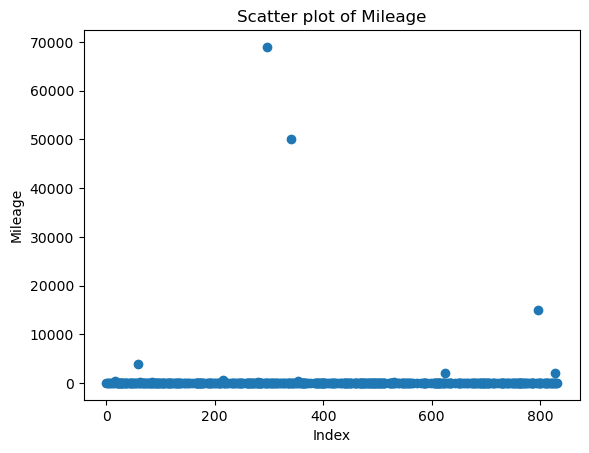

In [38]:
plt.scatter(df.index, df['Mileage'])
plt.title('Scatter plot of Mileage')
plt.xlabel('Index')
plt.ylabel('Mileage')
plt.show()


## Getting Median to fill Na values

In [39]:
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].median())


## Getting rid of both lower and upper outliers

In [40]:
Q1 = df['Mileage'].quantile(0.25)
Q3 = df['Mileage'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Mileage'] >= Q1 - 1.5 * IQR) & (df['Mileage'] <= Q3 + 1.5 * IQR)]


## Scatter plot after cleaning

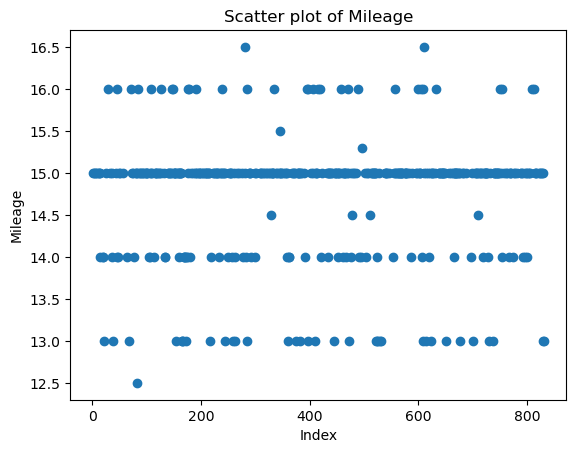

In [105]:
plt.scatter(df.index, df['Mileage'])
plt.title('Scatter plot of Mileage')
plt.xlabel('Index')
plt.ylabel('Mileage')
plt.savefig("Mileage.png", dpi=300, bbox_inches='tight')
plt.show()


## Making sure if there are any NAs

In [42]:
df['Mileage'].isna().sum()

0

## Checking the data type

In [43]:
df['Mileage'].dtype

dtype('float64')

## Looking for any unusual values in the column 'Make Year'

In [44]:
df['Make Year'].unique()

array([2013, 2017, 2019, 2004, 2014, 2010, 2018, 2011, 2015, 2016, 2003,
       2002, 1997, 2023, 2007, 2006, 2009, 2021, 2020, 2012, 2022, 2005,
       2008, 2000, 2001, 1998, 1975, 1999, 1992, 1993])

## Checking the data type

In [45]:
df['Make Year'].dtype

dtype('int32')

## Checking the count of NAs in column 'Kilometer Run'

In [46]:
df['Kilometer Run'].isnull().sum()

122

In [47]:
df['Kilometer Run']=pd.to_numeric(df['Kilometer Run'], errors='coerce').astype('Int64')

## Getting possible Outliers

In [48]:

Q1 = df['Kilometer Run'].quantile(0.25)
Q3 = df['Kilometer Run'].quantile(0.75)
IQR = Q3 - Q1

# Outliers are below (Q1 - 1.5*IQR) or above (Q3 + 1.5*IQR)
outliers = df[(df['Kilometer Run'] < (Q1 - 1.5 * IQR)) | (df['Kilometer Run'] > (Q3 + 1.5 * IQR))]
print(outliers[['Kilometer Run','Name']])

     Kilometer Run                                               Name
35          750840                             Scorpio S4+ (Mahindra)
173         610000                   Suzuki cargo van (Maruti Suzuki)
220         130000  Urgent Sale Tata xenon Doible cabin 4 WD 2015 ...
269         155000             Scorpio S4 Urgently Sell Ma (Mahindra)
338         114000                          Kia Hiace for sale. (Kia)
425         485780                            Ford Aspire 2015 (Ford)
474         127130                                   sales (Mahindra)
488         560000                          Tucson for sale (Hyundai)
553         143000                       KIA Sportage on Sale!! (Kia)
580         125000                        Excellent 9817874410 (Tata)
582         140000                               Toyota echo (Toyota)
612         750000  2010 maruti suzuki ritz fully loaded (Maruti S...
804         180000                                 Scorpio (Mahindra)


## Finding outliers using BoxPlot

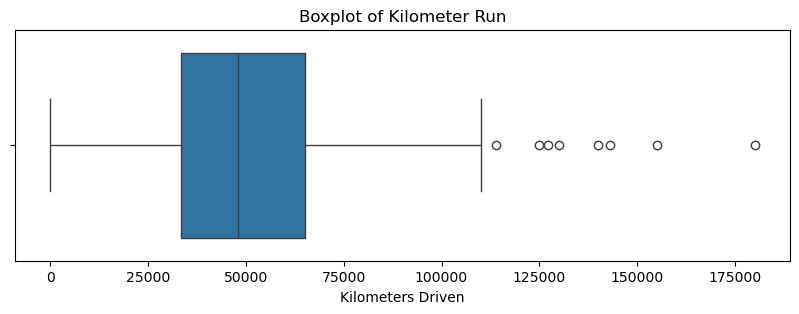

In [90]:
plt.figure(figsize=(10, 3))

sns.boxplot(x=df['Kilometer Run'])

plt.title('Boxplot of Kilometer Run')
plt.xlabel('Kilometers Driven')

plt.savefig("Boxplot.png", dpi=300, bbox_inches='tight')


plt.show()

## Removing values that are 0 and are greater than 200,000

In [93]:
df= df[(df['Kilometer Run'] >= 0) & (df['Kilometer Run'] < 125000)].copy()


## BoxPlot after removing possible outliers

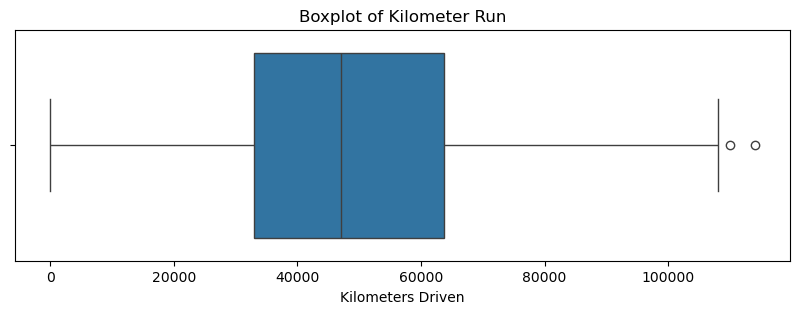

In [94]:
plt.figure(figsize=(10, 3))

sns.boxplot(x=df['Kilometer Run'])

plt.title('Boxplot of Kilometer Run')
plt.xlabel('Kilometers Driven')

plt.savefig("Boxplot2.png", dpi=300, bbox_inches='tight')
plt.show()

## The column has any Null?

In [52]:
df['Kilometer Run'].isnull().sum()

0

## Making sure the column has proper data type

In [53]:
df['Kilometer Run'].dtype

Int64Dtype()

In [54]:
# df.to_csv('cleaned_data.csv', index=False)


In [55]:
df['Fuel'].dtype

dtype('O')

In [56]:
df['Fuel']=df['Fuel'].astype('string')

## Fuel Type Distribution using Bar Plot

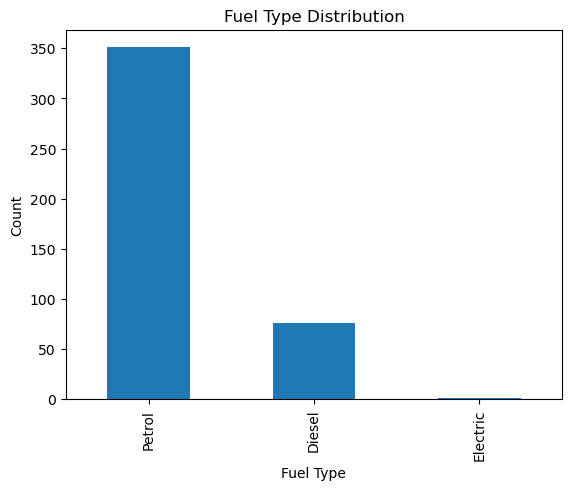

In [108]:
fuel_counts = df['Fuel'].value_counts()
fuel_counts.plot(kind='bar')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Fuel Type Distribution')
plt.savefig("FueType.png", dpi=300, bbox_inches='tight')
plt.show()


## Looking what needs to be corrected/cleaned

In [58]:
df['Engine (CC)'].unique()

array(['2956', '889', '800', '1200', '1100', '2500', '2100', '1400',
       '2499', nan, '1197', '1368', '1299', '2000', '1086', '1000',
       '1600', '250', '1084', '1300', '1500', '1948', '2882', '1599',
       '2900', '2523', '2179', '2200', '2400', '1198', '996', '1405',
       '1196', '2800', '15000', '2169', '1499', '2967', '1591', '702',
       '1298', '2700', '4898', '1096', '700', '1186', '1596', '1991',
       '3000', '796', '2157', '1656', '2999', '1248', '3200', '2600',
       '995', '1997', '1061', '3700', '1350', '1498', '1598', '2500 cc',
       '814', '1198cc', '4461', '1984', '1200cc', '2494', '2362', '999',
       '1197cc', '2755', '850', '1600 Cc', '1087', '1049', '2609 cc',
       '1199', '0', '901', '1490', '998', '1497', '1..2', '1399', '1998',
       '1956', '900', '1468', '1900', '15cc'], dtype=object)

## Removing letters from the values

In [59]:
df['Engine (CC)']=df['Engine (CC)'].str.rstrip('cC ')

## After cleaning

In [60]:
df['Engine (CC)'].unique()

array(['2956', '889', '800', '1200', '1100', '2500', '2100', '1400',
       '2499', nan, '1197', '1368', '1299', '2000', '1086', '1000',
       '1600', '250', '1084', '1300', '1500', '1948', '2882', '1599',
       '2900', '2523', '2179', '2200', '2400', '1198', '996', '1405',
       '1196', '2800', '15000', '2169', '1499', '2967', '1591', '702',
       '1298', '2700', '4898', '1096', '700', '1186', '1596', '1991',
       '3000', '796', '2157', '1656', '2999', '1248', '3200', '2600',
       '995', '1997', '1061', '3700', '1350', '1498', '1598', '814',
       '4461', '1984', '2494', '2362', '999', '2755', '850', '1087',
       '1049', '2609', '1199', '0', '901', '1490', '998', '1497', '1..2',
       '1399', '1998', '1956', '900', '1468', '1900', '15'], dtype=object)

In [61]:
df['Engine (CC)']=pd.to_numeric(df['Engine (CC)'], errors='coerce')
df['Engine (CC)']=df['Engine (CC)'].fillna(0)

## Looking for outliers

In [62]:
Q1 = df['Engine (CC)'].quantile(0.25)
Q3 = df['Engine (CC)'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Engine (CC)'] < (Q1 - 1.5 * IQR)) | (df['Engine (CC)'] > (Q3 + 1.5 * IQR))]
print(outliers[['Engine (CC)','Name']])



     Engine (CC)                                               Name
1        2956.00                          TATA 407 Container (Tata)
12       2500.00  2015 model bolero 7 seater 4wd,powerstering sa...
15       2499.00                   Isuzu Vcross 2019 (Other Brands)
17          0.00                                         Niro (Kia)
43          0.00  i20 activeS2016 just like brand new exchange o...
..           ...                                                ...
810        15.00          Tata manza car sale and exchange (Toyota)
820         0.00  2022 Mahindra Scorpio S5 4WD for sale or excha...
822      2500.00            Mahendra bolero pickup truck (Mahindra)
824      2500.00                        Bolero maxitruck (Mahindra)
831      2200.00  nissan xtrail 2007 model for sale or exchange ...

[100 rows x 2 columns]


## Converting to appropriate data type

In [63]:
df['Engine (CC)']=df['Engine (CC)'].astype(int)

## Removing CCs that are <100

In [64]:
print(df.shape)
df = df[df['Engine (CC)'] > 100].copy()
print(df.shape)

(474, 9)
(436, 9)


## Looking for any inconsistent values

In [65]:
df['Engine (CC)'].unique()

array([ 2956,   889,   800,  1200,  1100,  2500,  2100,  1400,  2499,
        1197,  1368,  1299,  2000,  1086,  1000,  1600,   250,  1084,
        1300,  1500,  1948,  2882,  1599,  2900,  2523,  2179,  2200,
        2400,  1198,   996,  1405,  1196,  2800, 15000,  2169,  1499,
        2967,  1591,   702,  1298,  2700,  4898,  1096,   700,  1186,
        1596,  1991,  3000,   796,  2157,  1656,  2999,  1248,  3200,
        2600,   995,  1997,  1061,  3700,  1350,  1498,  1598,   814,
        4461,  1984,  2494,  2362,   999,  2755,   850,  1087,  1049,
        2609,  1199,   901,  1490,   998,  1497,  1399,  1998,  1956,
         900,  1468,  1900])

## Renaming Column name from 'Engine (CC) to Engine(CC)'

In [66]:
df.rename(columns={'Engine (CC)': 'Engine(CC)'}, inplace=True)


In [67]:
df = df.drop(df[df['Engine(CC)'] == 15000].index)

## Saving new Csv after cleaning

In [68]:
df.to_csv('cleaned_data.csv', index=False)

## Making sure if every column has proper DataType

In [69]:
df.dtypes

Name                     object
Price(in Nrs)             int64
Transmisson      string[python]
Colour           string[python]
Make Year                 int32
Mileage                 float64
Engine(CC)                int32
Fuel             string[python]
Kilometer Run             Int64
dtype: object

## Summary Statistics

In [70]:
df.describe()


,Price(in Nrs),Make Year,Mileage,Engine(CC),Kilometer Run
count,435.00,435.00,435.00,435.00,435.00
mean,2375167.51,2013.31,14.77,1462.69,49577.07
std,2422383.11,5.53,0.72,565.68,26607.76
min,150000.00,1975.00,12.50,250.00,0.00
25%,1237500.00,2010.00,15.00,1197.00,33427.00
50%,1775000.00,2014.00,15.00,1200.00,48000.00
75%,2575000.00,2017.00,15.00,1598.50,65000.00
max,24000000.00,2022.00,16.50,4898.00,180000.00


## Correlation Matrix using HeatMap

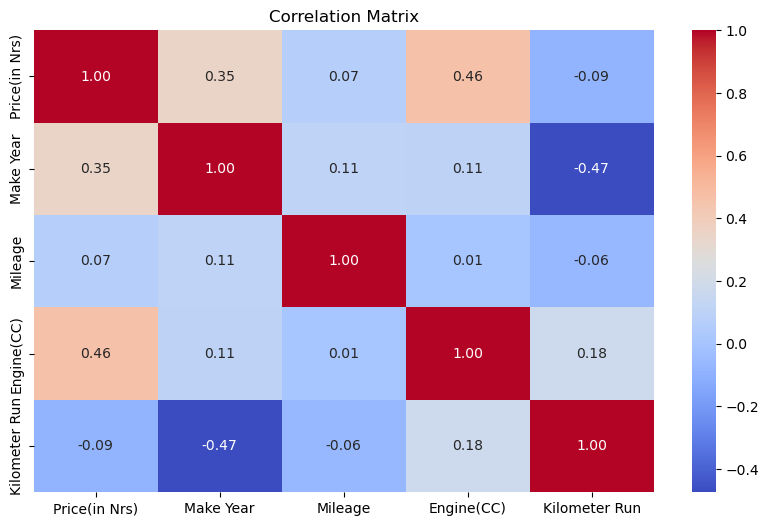

In [111]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.savefig("Correlation.png", dpi=300, bbox_inches='tight')
plt.show()


## Car Price Distribution using Histogram

Text(0.5, 1.0, 'Car Price Distribution')

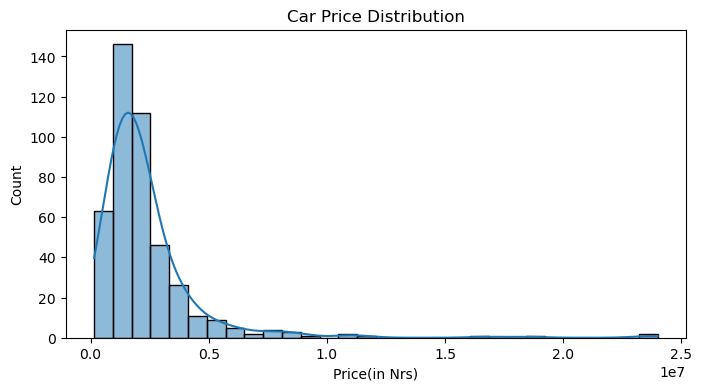

In [72]:
plt.figure(figsize=(8,4))
sns.histplot(df['Price(in Nrs)'], bins=30, kde=True)
plt.title("Car Price Distribution")


## Relation between Mileage and price using ScatterPlot

Text(0.5, 1.0, 'Mileage vs Price')

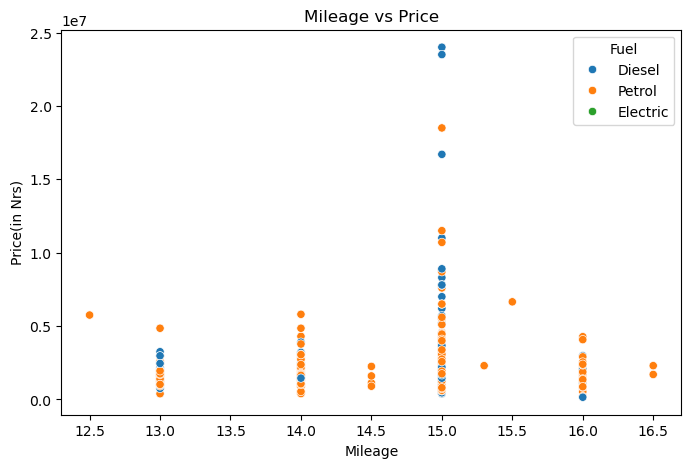

In [73]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Mileage', y='Price(in Nrs)', hue='Fuel', data=df)

plt.title("Mileage vs Price")


# Mileage vs Km run

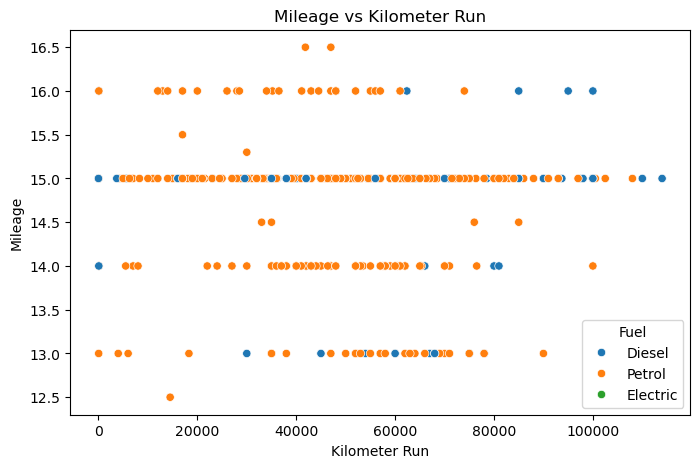

In [107]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Kilometer Run", y="Mileage", hue="Fuel", data=df)
plt.title("Mileage vs Kilometer Run")
plt.savefig("Mileage2.png", dpi=300, bbox_inches='tight')
plt.show()

## Price vs Engine Capacity by Fuel

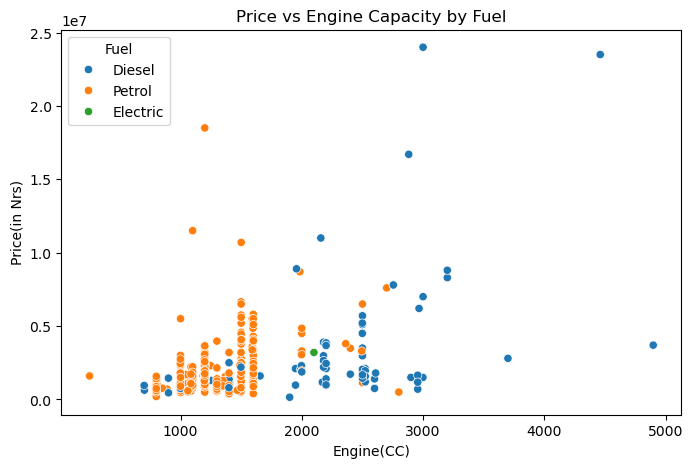

In [75]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Engine(CC)", y="Price(in Nrs)", hue="Fuel", data=df)
plt.title("Price vs Engine Capacity by Fuel")
plt.show()


## Avergae Car Price By Fuel Type using Barplot

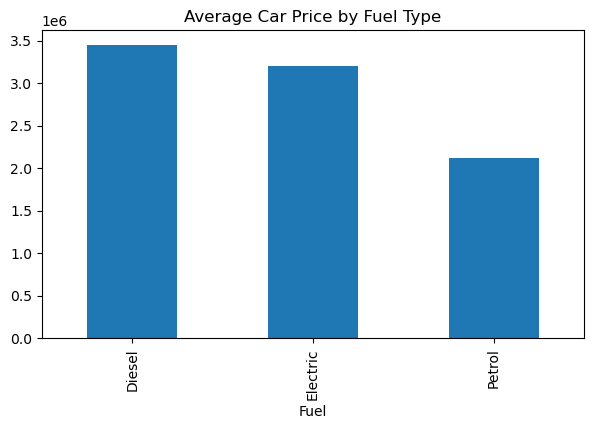

In [76]:
fuel_price = df.groupby('Fuel')['Price(in Nrs)'].mean().sort_values(ascending=False)
fuel_price.plot(kind='bar', figsize=(7,4), title="Average Car Price by Fuel Type")
plt.show()


In [77]:
df.dtypes

Name                     object
Price(in Nrs)             int64
Transmisson      string[python]
Colour           string[python]
Make Year                 int32
Mileage                 float64
Engine(CC)                int32
Fuel             string[python]
Kilometer Run             Int64
dtype: object

In [78]:
df.isnull().sum()

Name             0
Price(in Nrs)    0
Transmisson      0
Colour           0
Make Year        0
Mileage          0
Engine(CC)       0
Fuel             0
Kilometer Run    0
dtype: int64

## Average Price Trend by Make Year

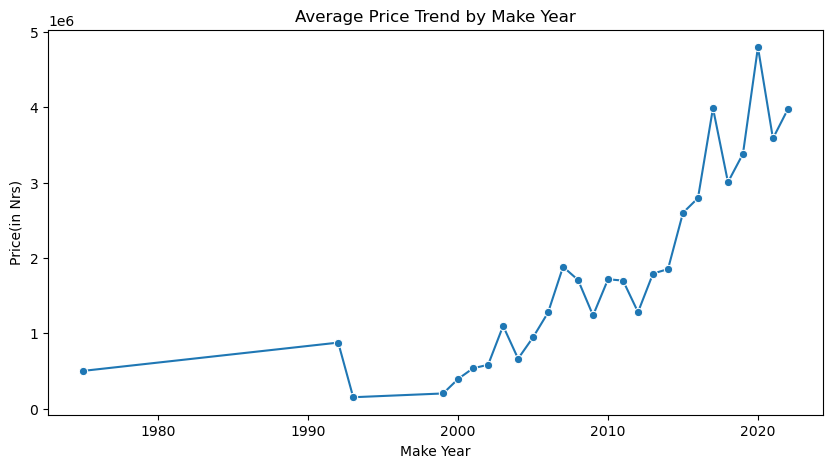

In [110]:
avg_price_by_year = df.groupby("Make Year")["Price(in Nrs)"].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(x="Make Year", y="Price(in Nrs)", data=avg_price_by_year, marker="o")
plt.title("Average Price Trend by Make Year")
plt.savefig("AveragePrice.png", dpi=300, bbox_inches='tight')
plt.show()

## Most Frequent Brands

In [80]:
df_new=df.copy()

In [81]:
df_new['Name']=df['Name'].str.extract(r'\((.*?)\)')

In [82]:
grouped=df_new.groupby('Name')['Name'].count()
grouped=grouped[grouped>1].sort_values(ascending=False)
grouped

Name
Hyundai                 120
Maruti Suzuki            92
Mahindra                 30
Tata                     27
Ford                     26
Toyota                   22
Kia                      21
Volkswagen               15
Other Brands             12
Nissan                   10
Honda                     9
Daihatsu                  6
Renault                   6
Chevrolet                 4
Other Chinese Brands      3
Skoda                     3
Datsun                    3
Mazda                     2
Fiat                      2
Name: Name, dtype: int64

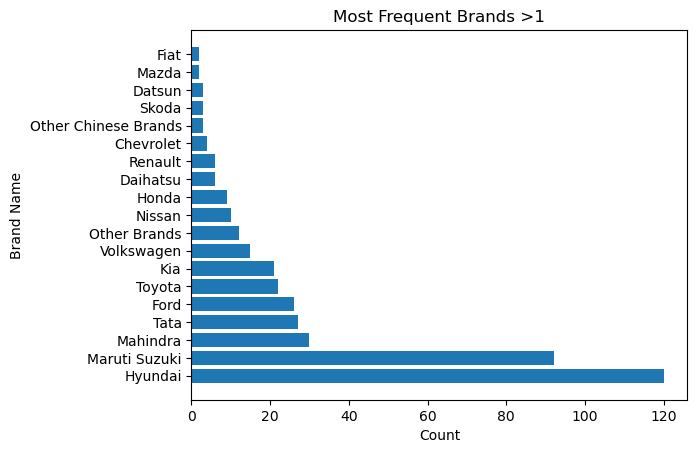

In [109]:
plt.barh(grouped.index,grouped.values)
plt.title('Most Frequent Brands >1')
plt.xlabel('Count')
plt.ylabel('Brand Name')
plt.savefig("Brand.png", dpi=300, bbox_inches='tight')

plt.show()

## Most Popular colors

In [84]:
grouped_color=df.groupby('Colour')['Colour'].value_counts()
grouped_color

Colour
black       3
blue        8
brown       1
gold        3
green       3
grey       19
orange      2
other     297
red        15
silver     54
white      30
Name: count, dtype: int64

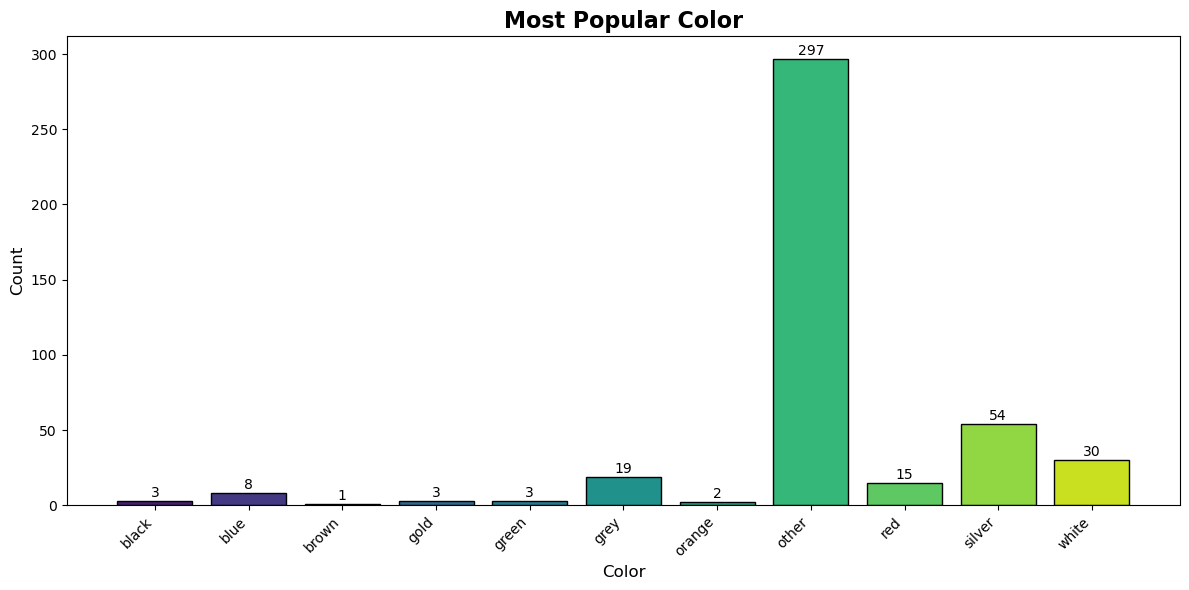

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("viridis", len(grouped_color))

plt.figure(figsize=(12,6))
bars = plt.bar(grouped_color.index, grouped_color.values, color=colors, edgecolor='black')

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, int(yval), ha='center', va='bottom')

plt.title('Most Popular Color', fontsize=16, fontweight='bold')
plt.xlabel('Color', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Befor vs After cleaning

In [86]:
df_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           848 non-null    object 
 1   Price          848 non-null    object 
 2   Used For       357 non-null    object 
 3   Transmisson    848 non-null    object 
 4   Colour         766 non-null    object 
 5   Make Year      848 non-null    object 
 6   Mileage        458 non-null    object 
 7   Engine (CC)    741 non-null    object 
 8   Fuel           848 non-null    object 
 9   Kilometer Run  706 non-null    object 
 10  Waranty        209 non-null    object 
 11  Types          0 non-null      float64
dtypes: float64(1), object(11)
memory usage: 79.6+ KB


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 435 entries, 1 to 831
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           435 non-null    object 
 1   Price(in Nrs)  435 non-null    int64  
 2   Transmisson    435 non-null    string 
 3   Colour         435 non-null    string 
 4   Make Year      435 non-null    int32  
 5   Mileage        435 non-null    float64
 6   Engine(CC)     435 non-null    int32  
 7   Fuel           435 non-null    string 
 8   Kilometer Run  435 non-null    Int64  
dtypes: Int64(1), float64(1), int32(2), int64(1), object(1), string(3)
memory usage: 31.0+ KB


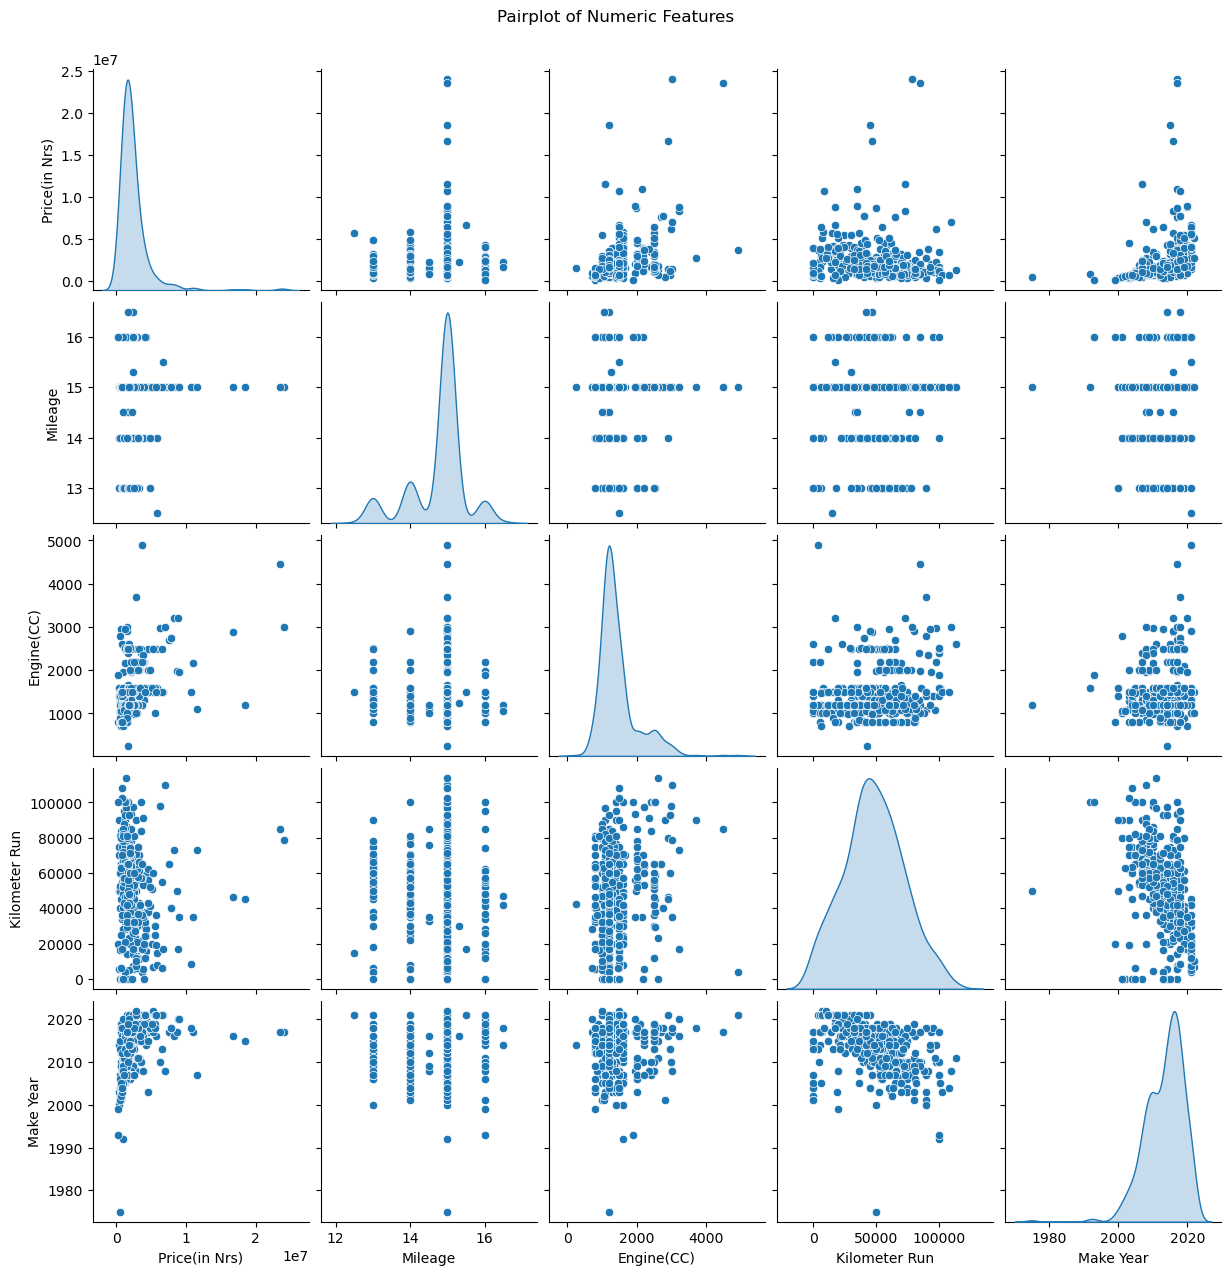

In [112]:
sns.pairplot(df[["Price(in Nrs)", "Mileage", "Engine(CC)", "Kilometer Run", "Make Year"]], diag_kind="kde")
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.savefig("Pair.png", dpi=300, bbox_inches='tight')
plt.show()

In [89]:
df

,Name,Price(in Nrs),Transmisson,Colour,Make Year,Mileage,Engine(CC),Fuel,Kilometer Run
1,TATA 407 Container (Tata),700000,Manual2WD,other,2013,15.00,2956,Diesel,60000
4,Mega XL hatti gadi (Tata),700000,Auto2WD,other,2019,15.00,889,Petrol,80000
5,Maruti Suzuki Alto 2004 On Sale (Maruti Suzuki),580000,Manual2WD,other,2004,15.00,800,Petrol,75000
6,Grand i10 magna 2014 (Hyundai),1845000,Manual2WD,other,2014,15.00,1200,Petrol,31000
9,2010 model red color santro zinc for sale (Hyu...,1350000,Manual4WD,red,2010,15.00,1100,Petrol,4200
...,...,...,...,...,...,...,...,...,...
826,Honda City 2004 (Honda),799999,Manual2WD,other,2004,15.00,1498,Petrol,108000
828,Well maintained car. Everything is fine. Singl...,1925000,Manual2WD,other,2015,15.00,1200,Petrol,60000
829,VW Polo 2014 Highline 1200 (Renault),1950000,Manual2WD,other,2014,13.00,1200,Petrol,60000
830,Hyundai i10 magna 2014 (Hyundai),1750000,Manual2WD,silver,2014,15.00,1200,Petrol,93000


## Feature Extraction

In [95]:
df_copy2=df.copy()

In [98]:
df_copy2['Car_Age']=2025-df['Make Year']

In [100]:
df_copy2['Price Per km']=df['Price(in Nrs)']/df['Kilometer Run']

In [103]:
df_copy2['Kilometer Per Year']=df['Kilometer Run']/df_copy2['Car_Age']